In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [3]:
#create known parameters
weight = 0.7
bias = .3

#create data
start = 0
end = 1
step = .02
x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias
x[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
#spliting data into training and testing sets
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

In [5]:
def plot_predictions(train_data=x_train, 
                     train_labels=y_train, 
                     test_data=x_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

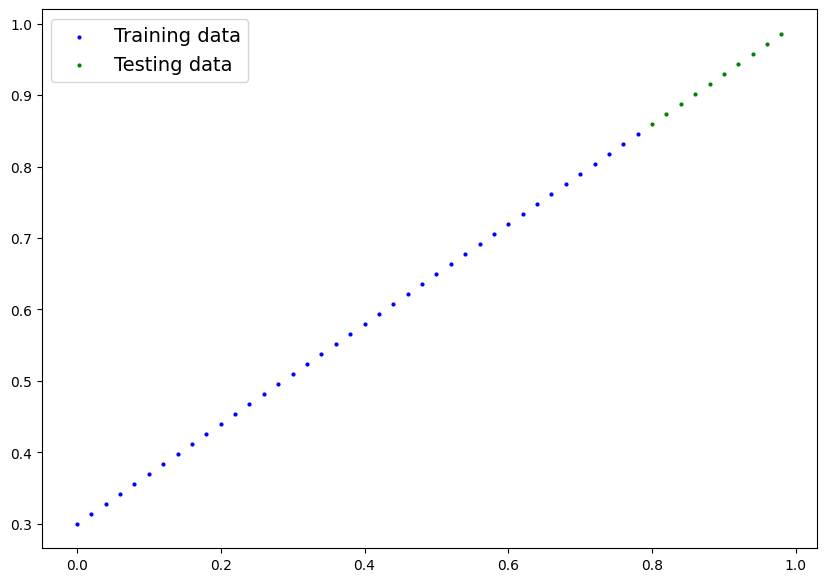

In [6]:
plot_predictions();

In [7]:
#create a model

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        #weights
        self.weights = nn.Parameter(torch.randn(1,
        requires_grad=True,
        dtype=torch.float
        ))
        #bias
        self.bias = nn.Parameter(torch.randn(1,
        requires_grad=True,
        dtype=float
        ))

    #forward propagation
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return x * self.weights + self.bias

In [11]:
#view details of model
torch.manual_seed(0)

#instance of model
model_0 = LinearRegressionModel()

#check the nn parameters
list(model_0.parameters())

#state of the model
print(model_0.state_dict())

OrderedDict([('weights', tensor([1.5410])), ('bias', tensor([-0.2934], dtype=torch.float64))])


In [14]:
#making predictions with our model

with torch.inference_mode():
    y_preds = model_0(x_test)

In [15]:
#view predictions

print(f"Number of test samples: {len(x_test)}")
print(f"Number of predictions: {len(y_preds)}")
print(f"Predictions: {y_preds}")

Number of test samples: 10
Number of predictions: 10
Predictions: tensor([[0.9394],
        [0.9702],
        [1.0010],
        [1.0318],
        [1.0626],
        [1.0935],
        [1.1243],
        [1.1551],
        [1.1859],
        [1.2167]], dtype=torch.float64)


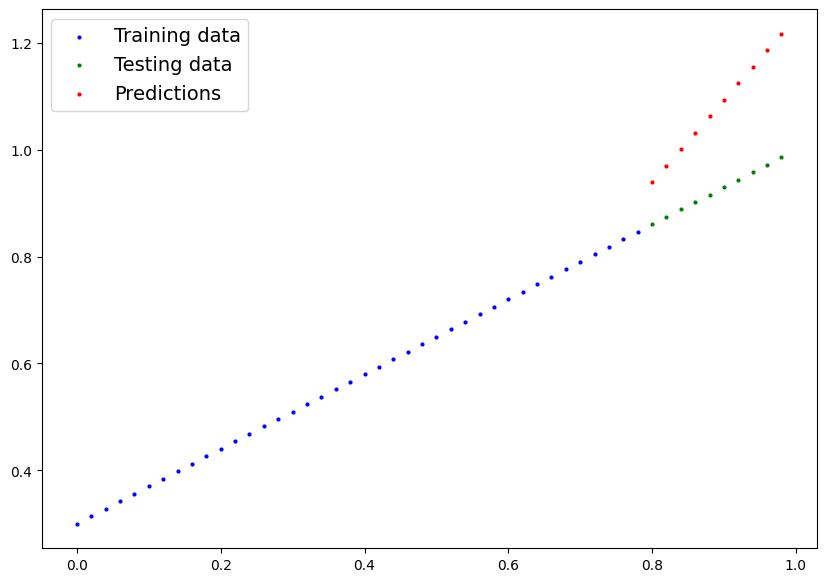

In [16]:
#plotting predictions
plot_predictions(predictions=y_preds)

In [18]:
#calculating loss and implmenting the loss function and optimizer
#using SGD (stochastic gradient descent ) -> for regression problem

loss_fn = nn.L1Loss() # loss function MAE

#optimizer 
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01) 

In [ ]:
#training the model